# 特征相关性分析-信息增益率

In [1]:
import pandas as pd
import numpy as np
#定义计算信息熵的函数：计算Infor(D)
def infor(data):
    a = pd.value_counts(data) / len(data)
    return sum(np.log2(a) * a * (-1))

In [2]:
#定义计算信息增益的函数：计算g(D|A)
def g(data,str1,str2):
    e1 = data.groupby(str1).apply(lambda x:infor(x[str2]))
    p1 = pd.value_counts(data[str1]) / len(data[str1])
    #计算Infor(D|A)
    e2 = sum(e1 * p1)
    return infor(data[str2]) - e2

In [3]:
#定义计算信息增益率的函数：计算gr(D,A)
def gr(data,str1,str2):
    return g(data,str1,str2)/infor(data[str1])

In [4]:
data=pd.read_csv('kc2_2.csv')
data.columns = ["1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","bug"]
data.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,bug
0,4.693440,2.858425,2.736421,2.503050,5.727662,7.502298,0.031749,3.407067,4.144955,10.874792,...,4.523758,1.321084,2.505478,0.536029,3.004228,3.734673,5.208262,4.832067,3.492434,1.0
1,4.766487,2.956562,2.840137,2.590101,5.838405,7.602190,0.040380,3.144838,4.511866,10.702564,...,4.639566,1.217420,2.289823,0.000000,2.723211,3.792395,5.336091,4.915751,3.596281,1.0
2,4.158883,2.397895,1.609438,1.791759,5.062595,6.722401,0.048790,2.954910,3.841386,9.622682,...,4.025352,1.098612,1.609438,0.000000,2.708050,3.258097,4.532599,4.189655,2.995732,0.0
3,1.791759,0.693147,0.693147,0.693147,1.791759,2.534490,0.512824,0.916291,2.167910,2.912894,...,1.098612,0.000000,0.000000,0.000000,1.386294,1.098612,1.386294,1.098612,0.693147,0.0
4,4.807068,2.840650,2.194348,2.617507,5.836210,7.633333,0.044379,3.187551,4.498615,10.778277,...,4.602952,1.373985,2.692523,1.418102,2.863139,3.929869,5.306996,4.951897,3.472963,1.0


In [5]:
data['bug'].unique()

array([1., 0.])

In [6]:
features = ["1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21"]
lists = []
for feature in features:
    lists.append(gr(data,feature,'bug'))
print(lists)

[0.12422222588834658, 0.10701278396797113, 0.08659579892968074, 0.11090595554257432, 0.1266351677104686, 0.1263653529314435, 0.11863930474465023, 0.12853100630539155, 0.12308144754613483, 0.12408490866803626, 0.12253124085037846, 0.12408490866803626, 0.12654497630453174, 0.09402502889665974, 0.12000468276462124, 0.07550691204553285, 0.10491716305177497, 0.11592976077935281, 0.12405683192703687, 0.12140487766362568, 0.10636921743181249]


In [7]:
data1 = data.drop(labels=['bug'],axis=1)

In [8]:
IGR = pd.Series(lists)
IGR.index = data1.columns
IGR.sort_values(ascending=False)

8     0.128531
5     0.126635
13    0.126545
6     0.126365
1     0.124222
12    0.124085
10    0.124085
19    0.124057
9     0.123081
11    0.122531
20    0.121405
15    0.120005
7     0.118639
18    0.115930
4     0.110906
2     0.107013
21    0.106369
17    0.104917
14    0.094025
3     0.086596
16    0.075507
dtype: float64

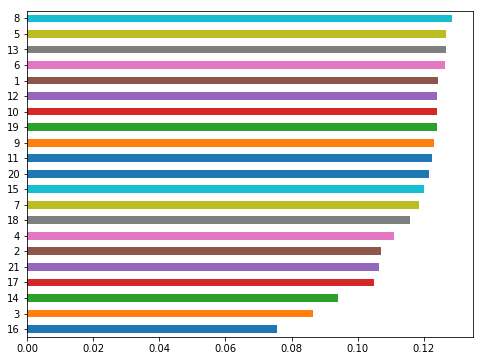

In [10]:
#let's plot the ordered mutual_info values per feature
import matplotlib.pyplot as plot
IGR.sort_values(ascending=True).plot.barh(figsize=(8, 6))

# 特征相关性分析-互信息

In [6]:
X_1 = data.drop(labels=['bug'], axis=1)
y_1 = data['bug']

In [7]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_1, y_1)
mutual_info

array([0.23931491, 0.22324674, 0.11026177, 0.19082758, 0.23151927,
       0.22859191, 0.22100446, 0.20888694, 0.21019134, 0.26344047,
       0.2218249 , 0.26495615, 0.21683353, 0.16947158, 0.21872465,
       0.03146785, 0.24406312, 0.2496025 , 0.20318265, 0.19126189,
       0.24428749])

In [8]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_1.columns
mutual_info.sort_values(ascending=False)

12    0.264956
10    0.263440
18    0.249603
21    0.244287
17    0.244063
1     0.239315
5     0.231519
6     0.228592
2     0.223247
11    0.221825
7     0.221004
15    0.218725
13    0.216834
9     0.210191
8     0.208887
19    0.203183
20    0.191262
4     0.190828
14    0.169472
3     0.110262
16    0.031468
dtype: float64

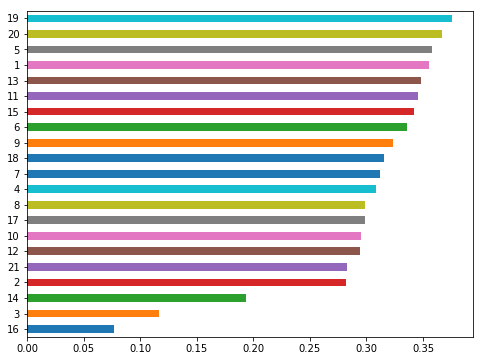

In [15]:
#let's plot the ordered mutual_info values per feature
import matplotlib.pyplot as plot
mutual_info.sort_values(ascending=True).plot.barh(figsize=(8, 6))

# 特征相关性分析-卡方值

In [16]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_1,y_1)
f_p_values

(array([ 65.88851769,  56.02452318,  29.67133558,  45.08256705,
         79.81761269,  93.29277927,  19.20059121,  46.13295094,
         33.73149237, 162.57483534,  29.49740218, 218.73727405,
         86.90015238,  86.10442356, 130.31824414,  25.90140486,
         19.01820882,  69.70897392,  84.30010853, 103.54793951,
         74.84534934]),
 array([4.77163452e-16, 7.15726811e-14, 5.11861374e-08, 1.88899528e-11,
        4.10616098e-19, 4.51034601e-22, 1.17676940e-05, 1.10494369e-11,
        6.32681106e-09, 3.09816819e-37, 5.59917016e-08, 1.70537482e-49,
        1.14140576e-20, 1.70680613e-20, 3.49075491e-30, 3.59307556e-07,
        1.29476978e-05, 6.87326849e-17, 4.25091845e-20, 2.54168990e-24,
        5.09068376e-18]))

In [18]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_1.columns
p_values

1     4.771635e-16
2     7.157268e-14
3     5.118614e-08
4     1.888995e-11
5     4.106161e-19
6     4.510346e-22
7     1.176769e-05
8     1.104944e-11
9     6.326811e-09
10    3.098168e-37
11    5.599170e-08
12    1.705375e-49
13    1.141406e-20
14    1.706806e-20
15    3.490755e-30
16    3.593076e-07
17    1.294770e-05
18    6.873268e-17
19    4.250918e-20
20    2.541690e-24
21    5.090684e-18
dtype: float64

In [19]:
p_values.sort_index(ascending=False)

9     6.326811e-09
8     1.104944e-11
7     1.176769e-05
6     4.510346e-22
5     4.106161e-19
4     1.888995e-11
3     5.118614e-08
21    5.090684e-18
20    2.541690e-24
2     7.157268e-14
19    4.250918e-20
18    6.873268e-17
17    1.294770e-05
16    3.593076e-07
15    3.490755e-30
14    1.706806e-20
13    1.141406e-20
12    1.705375e-49
11    5.599170e-08
10    3.098168e-37
1     4.771635e-16
dtype: float64

# --------------------------------------------------------------------------------------------

In [20]:
del data['3']
del data['16']
del data['14']

In [21]:
data.head()

,1,2,4,5,6,7,8,9,10,11,12,13,15,17,18,19,20,21,bug
0,2.302585,0.693147,0.693147,2.397895,3.433987,0.262364,1.465568,2.302585,4.615121,0.009950,1.880991,1.609438,1.098612,1.791759,1.386294,1.945910,1.609438,0.693147,0.0
1,2.580132,1.098612,0.693147,3.307601,4.684089,0.220235,1.629474,3.301905,6.087572,0.037801,3.235824,2.154245,0.642464,2.088054,2.437859,2.805222,2.606668,1.386294,1.0
2,4.969813,3.295837,3.091042,6.042633,7.878864,0.029559,3.640477,4.278470,11.492411,0.631272,8.602212,4.762174,2.639057,3.218876,4.007333,5.537334,5.123964,3.951244,1.0
3,4.941642,3.496508,2.397895,6.056784,7.893042,0.039221,3.244933,4.696472,11.098026,0.636577,8.207912,4.779123,2.833213,2.890372,4.127134,5.521461,5.181784,4.158883,1.0
4,2.084363,0.875235,0.693147,2.566164,3.689585,0.295645,1.370001,2.666960,4.746885,0.014375,1.995749,1.380035,0.875235,1.791759,1.697575,2.058771,1.820509,1.004428,1.0


In [22]:
X = data.drop(labels=['bug'], axis=1)
y = data['bug']

# 特征相关性分析阶段

In [23]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
#Symmetrical Uncertainty
#entropy
from scipy.stats import entropy
import numpy as np
#Joint Entropy
def jEntropy(Y,X):
    YX = np.c_[Y,X]
    return entropy(YX)

#conditional entropy
def cEntropy(Y, X):
    return jEntropy(Y, X) - entropy(X)

#SU
def symmetricalUncertain(Y,X):
    n = float(y.shape[0])
    vals = np.unique(Y)
    # Computing Entropy for the feature x. 
    Hx = entropy(X)
    # Computing Entropy for the feature y.
    Hy = entropy(Y)
    #Computing Joint entropy between x and y.
    Hxy = jEntropy(Y,X)
    IG = Hx-Hxy
    return 2*IG/(Hx+Hy)

In [65]:
top_n1 =[]
for i in X.columns.values:
    X[i]=X[i].astype('float64')
    top_n1.append(symmetricalUncertain(X[i],X["10"]))
# print (top_n1)
top_n2=[row[1] for row in top_n1]
print (top_n2)

col_name1 = np.array(X.columns)
a1 = pd.DataFrame(top_n2)
b1 = pd.DataFrame(col_name1)
info3 = pd.concat([a1,b1], axis=1)
info3.columns = ['Score','Features']
# info3

[7.863261296672037e-16, 7.910474804070692e-16, 7.905450991669285e-16, 7.866964925472921e-16, 7.862738188647541e-16, 8.133290250483238e-16, 7.876976275798957e-16, 7.845769267968878e-16, 7.878999150106196e-16, 8.328604424813393e-16, 7.952884458132895e-16, 7.895061814893151e-16, 8.109521389746221e-16, 7.837385135496227e-16, 7.891361376175856e-16, 7.87660868836721e-16, 7.907701437569471e-16, 7.923309663704217e-16]


In [66]:
SU = pd.Series(top_n2)
SU.index = X.columns
SU.sort_values(ascending=False)

11    8.328604e-16
7     8.133290e-16
15    8.109521e-16
12    7.952884e-16
21    7.923310e-16
2     7.910475e-16
20    7.907701e-16
4     7.905451e-16
13    7.895062e-16
18    7.891361e-16
10    7.878999e-16
8     7.876976e-16
19    7.876609e-16
5     7.866965e-16
1     7.863261e-16
6     7.862738e-16
9     7.845769e-16
17    7.837385e-16
dtype: float64

In [40]:
corr_features = ["6","5","8","9","20","18","19","10","13"]
data2=data.drop(corr_features,axis=1)
data2.head()

,1,2,4,7,11,12,15,17,21,bug
0,1.609438,0.693147,0.693147,0.512824,0.000000,0.512824,0.000000,1.386294,0.693147,0.0
1,3.440424,0.845543,0.782293,0.098336,0.078987,4.956367,1.233898,2.502505,2.190275,1.0
2,3.395635,1.386294,1.386294,0.079520,0.110839,5.463206,0.986052,2.604675,1.791759,1.0
3,2.890372,1.098612,1.098612,0.113329,0.048790,4.214643,0.693147,2.397895,1.386294,0.0
4,1.098612,0.693147,0.693147,0.693147,0.000000,0.231112,0.000000,1.098612,0.693147,0.0


In [41]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop("bug",axis=1),
    data2["bug"],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((650, 9), (279, 9))

In [45]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score,roc_auc_score
SVM = LinearSVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
#SVM.score(X_test,y_test)
f1_score1 = f1_score(y_test,y_pred)
roc_auc_score1 = roc_auc_score(y_test,y_pred)
print(f1_score1)
print(roc_auc_score1)

0.7588652482269502
0.7562435765673176
